<a href="https://colab.research.google.com/github/coderanandmaurya/Campaign_for_selling_personal_loans/blob/main/personal_Loan_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import model_selection
from sklearn import metrics
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

# Import the data

In [ ]:
url = "https://raw.githubusercontent.com/coderanandmaurya/Campaign_for_selling_personal_loans/main/Bank_Personal_Loan_Modelling%20(1).csv"
df = pd.read_csv(url, encoding="unicode_escape")
df.head() ##this returns the first five rows of the dataset

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Column descriptions							

##	df Description:	

- binary category variable:

  - Personal Loan	: Did this customer accept the personal loan offered in the last campaign?
  - Securities Account : Does the customer have a securities account with the bank?
  - CD Account	: Does the customer have a certificate of deposit (CD) account with the bank?	
  - Online - Does the customer use internet banking facilities?
  - CreditCard :	Does the customer use a credit card issued by UniversalBank?

- Interval Variable:
  - Age	: Customer's age in completed years
  - Experience	: years of professional experience
  - Income	: Annual income of the customer in dollar
  - CCAvg	Avg. : spending on credit cards pr month in dollar
  - Mortgage :	Value of house mortgage if any in dollar

- Ordinal Categorical Variables are:
  - Family - Family size of the customer
  - Education :	Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

- The nominal variable is :
  - ID	: Customer ID		
  - Zip Code	

In [ ]:
#importing seaborn for statistical plots
#import seaborn as sns
#df_attr = df.iloc[:,0:12] #compare all attributes visually to check for relationships that can be exploited
#sns.pairplot(df_attr)

In [ ]:
# Age and experience have strong positive relation
# Age and income have no linear relationship
# Age and experience have no linear relationship

In [ ]:
df.groupby(["Personal Loan"]).count()  #The df set is skewed in terms of target column.
# There are far few records in class 1 i.e. people who took the personal loan last time. But that 
# is the class of interst to us! We have to identify potential customers and do not want any potential
# customer to be missed.

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
Personal Loan,,,,,,,,,,,,,
0,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520,4520
1,480,480,480,480,480,480,480,480,480,480,480,480,480


In [ ]:
df.isnull().sum() ##check for null values

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
df.duplicated().any() ##check for duplicate values

False

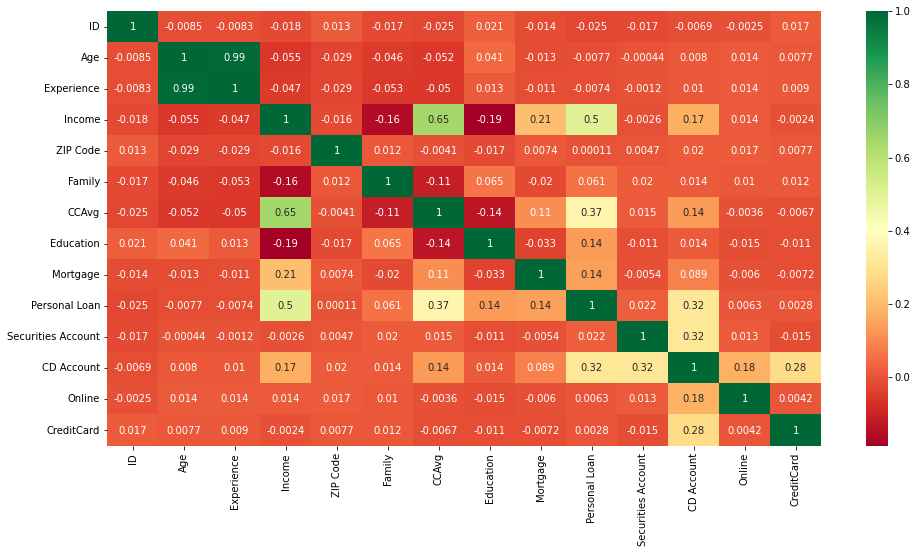

In [ ]:
plt.figure(figsize=[16,8])
corr = sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")

In [ ]:
#There are -ve numbmers in experience! lets change into +ve. 
df = df.abs() # Convert to non-negative using .abs function
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


# Data Cleaning and EDA

In [ ]:
df.shape ##returns the no. of rows and columns

(5000, 14)

In [ ]:
df.dtypes

ID                    float64
Age                   float64
Experience            float64
Income                float64
ZIP Code              float64
Family                float64
CCAvg                 float64
Education             float64
Mortgage              float64
Personal Loan         float64
Securities Account    float64
CD Account            float64
Online                float64
CreditCard            float64
dtype: object

# Splitting the Train and Test df

In [ ]:
# Separate the independent attributes and store them in X array
# Store the target column (column 8) into Y array

X_df = df.loc[:, df.columns != 'Personal Loan']
y_df = df.loc[:, df.columns == 'Personal Loan']

In [ ]:
X_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0,0.0,0.0,0.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0,0.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0,0.0,1.0,0.0
4996,4997.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0,0.0,1.0,0.0
4997,4998.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0,0.0,0.0,0.0
4998,4999.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
y_df 

,Personal Loan
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
4995,0.0
4996,0.0
4997,0.0
4998,0.0


In [ ]:
# Create the training and test data set in the ratio of 70:30 respectively
# Prepare data for logistic regression
features=X_df.iloc[:, 0:10]
features_array = features.values   #logistic modeling algorithm requires feature array not dfframe
target_labels = y_df.values

test_size = 0.40 # taking 60:40 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code when using random functions to 
# generate the training and test df

X_train, X_test, y_train, y_test = model_selection.train_test_split(features_array, target_labels, test_size=test_size, random_state=seed)
y_train = np.ravel(y_train)   # to convert 1 d vector into 1 d array

In [ ]:
features

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0
1,2.0,45.0,19.0,34.0,90089.0,3.0,1.5,1.0,0.0,1.0
2,3.0,39.0,15.0,11.0,94720.0,1.0,1.0,1.0,0.0,0.0
3,4.0,35.0,9.0,100.0,94112.0,1.0,2.7,2.0,0.0,0.0
4,5.0,35.0,8.0,45.0,91330.0,4.0,1.0,2.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4995,4996.0,29.0,3.0,40.0,92697.0,1.0,1.9,3.0,0.0,0.0
4996,4997.0,30.0,4.0,15.0,92037.0,4.0,0.4,1.0,85.0,0.0
4997,4998.0,63.0,39.0,24.0,93023.0,2.0,0.3,3.0,0.0,0.0
4998,4999.0,65.0,40.0,49.0,90034.0,3.0,0.5,2.0,0.0,0.0


In [ ]:
features_array

array([[1.000e+00, 2.500e+01, 1.000e+00, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [2.000e+00, 4.500e+01, 1.900e+01, ..., 1.000e+00, 0.000e+00,
        1.000e+00],
       [3.000e+00, 3.900e+01, 1.500e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [4.998e+03, 6.300e+01, 3.900e+01, ..., 3.000e+00, 0.000e+00,
        0.000e+00],
       [4.999e+03, 6.500e+01, 4.000e+01, ..., 2.000e+00, 0.000e+00,
        0.000e+00],
       [5.000e+03, 2.800e+01, 4.000e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

# Data Preprocessing & Model Selection

# LOGISTIC MODEL

In [ ]:
# Let us first try logistic regression to predict the personal loan affinity - 
# We removed the binned columns for this (considered only 11 columns 1:10) which are numeric

model = LogisticRegression()
model.fit(X_train, y_train)
model_score = model.score(X_test, y_test)
y_predict = model.predict(X_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_predict))

0.9125
[[1767   49]
 [ 126   58]]


In [ ]:
# The accuracy score of .954 looks impressive but do not forget, it is unreliable as it is a score at
# model level. Let us look at class level, especially the class 1.

# summarize the fit of the model
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1816
         1.0       0.54      0.32      0.40       184

    accuracy                           0.91      2000
   macro avg       0.74      0.64      0.68      2000
weighted avg       0.90      0.91      0.90      2000



In [ ]:
#The precision and recall for class 1 is low...

#Precision: Within a given set of positively-labeled results, the fraction that were 
#true positives = tp/(tp + fp) , this has to be calculated for each class i.e. 0 and 1 and should be
# high for the class less represented, class 1 in our example

#Recall: Given a set of positively-labeled results, the fraction of all positives that were 
#retrieved = tp/(tp + fn)

# Accuracy: tp + tn / (tp + tn + fp +fn) But this measure can be dominated by larger class. 
# Suppose 10, 90 and 80 of 90 is correctly predicted while only 2 of 0 is predicted correctly. 
# Accuracy is 80+2 / 100 i.e. 82%

# F is harmonic mean of precision and recal given by ((B^2 +1) PR) / (B^2P +R)
#When B is set to 1 we get F1 = 2PR / (P+R)

# Naive Bayes Model

In [ ]:
# Invoking the NB Gaussian function to create the model
# fitting the model in the training df set
model = GaussianNB()
model.fit(X_train, y_train)
predictions=model.predict(X_test)
print(model_score)
#Assess the accuracy of the model on test df
print(metrics.confusion_matrix(y_test,predictions))


0.9125
[[1692  124]
 [  74  110]]


In [ ]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1816
         1.0       0.47      0.60      0.53       184

    accuracy                           0.90      2000
   macro avg       0.71      0.76      0.74      2000
weighted avg       0.91      0.90      0.91      2000



## Naive Bayes also is not giving the class 1 metrics in the acceptal range (80% and above). Let us try

# K Nearest Neighbours 

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance')
NNH.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
predicted_labels = NNH.predict(X_test)

array([0., 0., 0., ..., 1., 0., 0.])

In [ ]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1783   33]
 [ 169   15]]


In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.91      0.98      0.95      1816
         1.0       0.31      0.08      0.13       184

    accuracy                           0.90      2000
   macro avg       0.61      0.53      0.54      2000
weighted avg       0.86      0.90      0.87      2000



In [ ]:
### Recall (true positives / (true positives + false negatives)) for class 1 is the least. That is 
### because majority of data points belong to class 0 and in KNN, probability of finding data points
### from class 0 closer to a test point than a data point from class 1 is high.

In [ ]:
### let us check the effect of scaling (convert all dimensions to z scores)
from sklearn import preprocessing
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
NNH.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [ ]:
predicted_labels = NNH.predict(X_test_scaled)

In [ ]:
print(metrics.confusion_matrix(y_test, predicted_labels))

[[1809    7]
 [  78  106]]


In [ ]:
predictions=model.predict(X_test)
print(model_score)

0.9125


In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted_labels))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98      1816
         1.0       0.94      0.58      0.71       184

    accuracy                           0.96      2000
   macro avg       0.95      0.79      0.85      2000
weighted avg       0.96      0.96      0.95      2000



In [ ]:
## scaled KNN algorithm gives the best result for class 1 till now. Let us check decision tree

## decision tree

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

# NEW WORLD

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df.drop(['ID','Experience'], axis=1), test_size=0.3 , random_state=100)

In [ ]:
train_labels = train_set.pop('Personal Loan')
test_labels = test_set.pop('Personal Loan')

In [ ]:
train_set

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4966,41.0,34.0,91361.0,1.0,0.7,1.0,143.0,0.0,0.0,0.0,0.0
4086,50.0,11.0,93106.0,4.0,0.2,1.0,0.0,1.0,0.0,0.0,0.0
2881,49.0,55.0,92103.0,4.0,0.1,3.0,0.0,0.0,0.0,1.0,0.0
1237,38.0,169.0,92093.0,1.0,6.8,3.0,0.0,0.0,1.0,1.0,1.0
1429,31.0,35.0,95064.0,1.0,0.6,3.0,171.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4149,41.0,53.0,93106.0,1.0,0.7,3.0,0.0,0.0,0.0,1.0,0.0
1890,52.0,184.0,90630.0,1.0,8.1,1.0,0.0,0.0,0.0,0.0,0.0
350,39.0,113.0,94301.0,1.0,1.0,3.0,0.0,1.0,0.0,1.0,0.0
79,50.0,19.0,94720.0,2.0,0.4,1.0,118.0,0.0,0.0,1.0,0.0


In [ ]:
test_set

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29.0,31.0,92126.0,4.0,0.3,2.0,0.0,0.0,0.0,1.0,0.0
2507,59.0,60.0,90048.0,4.0,2.1,1.0,234.0,0.0,0.0,1.0,1.0
2376,58.0,23.0,91768.0,3.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0
1378,54.0,34.0,93305.0,4.0,0.1,3.0,0.0,0.0,0.0,1.0,0.0
598,56.0,11.0,92374.0,2.0,0.2,3.0,90.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4276,50.0,155.0,92717.0,1.0,7.3,1.0,0.0,0.0,0.0,1.0,1.0
1528,34.0,134.0,94550.0,1.0,4.6,1.0,164.0,1.0,0.0,1.0,0.0
4259,52.0,158.0,94920.0,2.0,3.7,3.0,251.0,0.0,0.0,0.0,1.0
3686,60.0,122.0,92521.0,1.0,1.3,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_labels

4966    0.0
4086    0.0
2881    0.0
1237    1.0
1429    0.0
       ... 
4149    0.0
1890    0.0
350     0.0
79      0.0
3927    0.0
Name: Personal Loan, Length: 3500, dtype: float64

In [ ]:
test_labels

789     0.0
2507    0.0
2376    0.0
1378    0.0
598     0.0
       ... 
4276    0.0
1528    0.0
4259    1.0
3686    0.0
1372    1.0
Name: Personal Loan, Length: 1500, dtype: float64

# Apply models

## Split df into train and test

## Decision tree classifier

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [ ]:
dt_model.score(test_set , test_labels)

0.9773333333333334

In [ ]:
y_predict = dt_model.predict(test_set)

array([0., 0., 0., 0., 0.])

In [ ]:
test_set.head(5)

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
789,29.0,31.0,92126.0,4.0,0.3,2.0,0.0,0.0,0.0,1.0,0.0
2507,59.0,60.0,90048.0,4.0,2.1,1.0,234.0,0.0,0.0,1.0,1.0
2376,58.0,23.0,91768.0,3.0,0.2,1.0,0.0,0.0,0.0,0.0,0.0
1378,54.0,34.0,93305.0,4.0,0.1,3.0,0.0,0.0,0.0,1.0,0.0
598,56.0,11.0,92374.0,2.0,0.2,3.0,90.0,0.0,0.0,0.0,0.0


In [ ]:
print(metrics.confusion_matrix(y_test,predictions))

[[1692  124]
 [  74  110]]


In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1816
         1.0       0.47      0.60      0.53       184

    accuracy                           0.90      2000
   macro avg       0.71      0.76      0.74      2000
weighted avg       0.91      0.90      0.91      2000



## Naive Bayes

In [ ]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.8866666666666667

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))

[[1692  124]
 [  74  110]]


In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1816
         1.0       0.47      0.60      0.53       184

    accuracy                           0.90      2000
   macro avg       0.71      0.76      0.74      2000
weighted avg       0.91      0.90      0.91      2000



## Random Forest classifier

In [ ]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

RandomForestClassifier(max_depth=2, random_state=0)

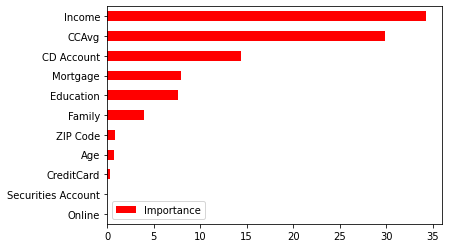

In [ ]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [ ]:
predicted_random=randomforest_model.predict(test_set)
randomforest_model.score(test_set,test_labels)

0.904

In [ ]:
print(metrics.confusion_matrix(y_test,predictions))

[[1692  124]
 [  74  110]]


In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1816
         1.0       0.47      0.60      0.53       184

    accuracy                           0.90      2000
   macro avg       0.71      0.76      0.74      2000
weighted avg       0.91      0.90      0.91      2000



## KNN ( K - Nearest Neighbour )

In [ ]:
train_set_indep = df.drop(['Experience' ,'ID'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_dep = df["Personal Loan"]
X = np.array(train_set_indep)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)
print(acc)

0.9106070713809206


In [ ]:
print(metrics.confusion_matrix(y_test,predictions))

[[1692  124]
 [  74  110]]


In [ ]:
# summarize the fit of the model
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      1816
         1.0       0.47      0.60      0.53       184

    accuracy                           0.90      2000
   macro avg       0.71      0.76      0.74      2000
weighted avg       0.91      0.90      0.91      2000



## Model comparison

In [ ]:
X=df.drop(['Personal Loan','Experience','ID'],axis=1)
y=df.pop('Personal Loan')

In [ ]:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,shuffle=True. random_state=11111)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

SyntaxError: ignored

## Conclusion
### The aim of the universal bank is to convert there liability customers into loan customers. They want to set up a new marketing campaign; hence, they need information about the connection between the variables given in the df. Four classification algorithms were used in this study. From the above graph , it seems like Decision Tree algorithm have the highest accuracy and we can choose that as our final model

In [ ]:
df.head(1)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,1.0,25.0,1.0,49.0,91107.0,4.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0


#COMPARE


In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://raw.githubusercontent.com/coderanandmaurya/Campaign_for_selling_personal_loans/main/Bank_Personal_Loan_Modelling%20(1).csv"
df = pd.read_csv(url, encoding="unicode_escape")
names = ["ID",	"Age","Experience",	"Income",	"ZIP Code",	"Family","CCAvg"	,"Education",	"Mortgage",	"Personal Loan",	"Securities Account",	"CD Account",	"Online",	"CreditCard"]
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10,shuffle=True, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()